# Question 2 [Marks 40]
Epilepsy is a nervous system disorder that affects movement. The dataset
contains 195 records of various people with 23 features that contain
biomedical measurements. Your model will be used to differentiate
healthy people from people having the disease. Target Column is 'status'.
Identify the model with the best params. Please note: Visualisation is
mandatory. You will receive 0 marks if you do not add visualisation.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_table("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/epilepsy.data",delimiter = ',')

In [5]:
# To show us total number of rows and columns in the given dataframe.
df.shape

(195, 24)

In [6]:
# To show us the column names in the given dataframe.
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [7]:
# To show us the first five records of the dataframe.
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [8]:
#This gives us details about each individual column's null values  and data-types it contains.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          193 non-null    float64
 8   Jitter:DDP        194 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [9]:
# It gives us the various details about the numerical columns in the dataframe.
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,193.000000,194.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003468,0.009932,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002765,0.008925,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001880,0.004982,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002700,0.007455,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003960,0.011558,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [10]:
# To check whether there are any null values in the dataframe and to resolve this issue.
print('The number of null values are:',df.isnull().sum().sum())
#Filling all null values with 0.
df = df.fillna(0)
print('The number of null values are:',df.isnull().sum().sum())

The number of null values are: 3
The number of null values are: 0


<AxesSubplot:xlabel='MDVP:Fo(Hz)', ylabel='status'>

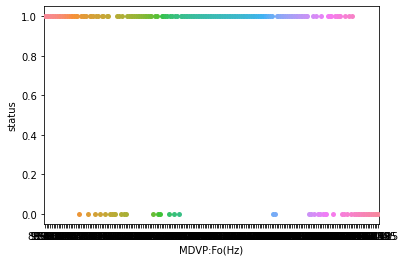

In [11]:
#The below chart shows us how the elements in 'MDVP:Fo(Hz)' column are split up based on another column:
sns.stripplot(x='MDVP:Fo(Hz)',y='status',data=df)

<AxesSubplot:xlabel='status', ylabel='count'>

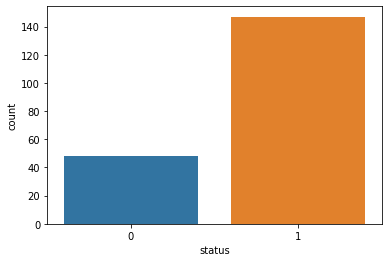

In [12]:
# Chart for comparing the values in "STATUS" feature.
sns.countplot(df.status)

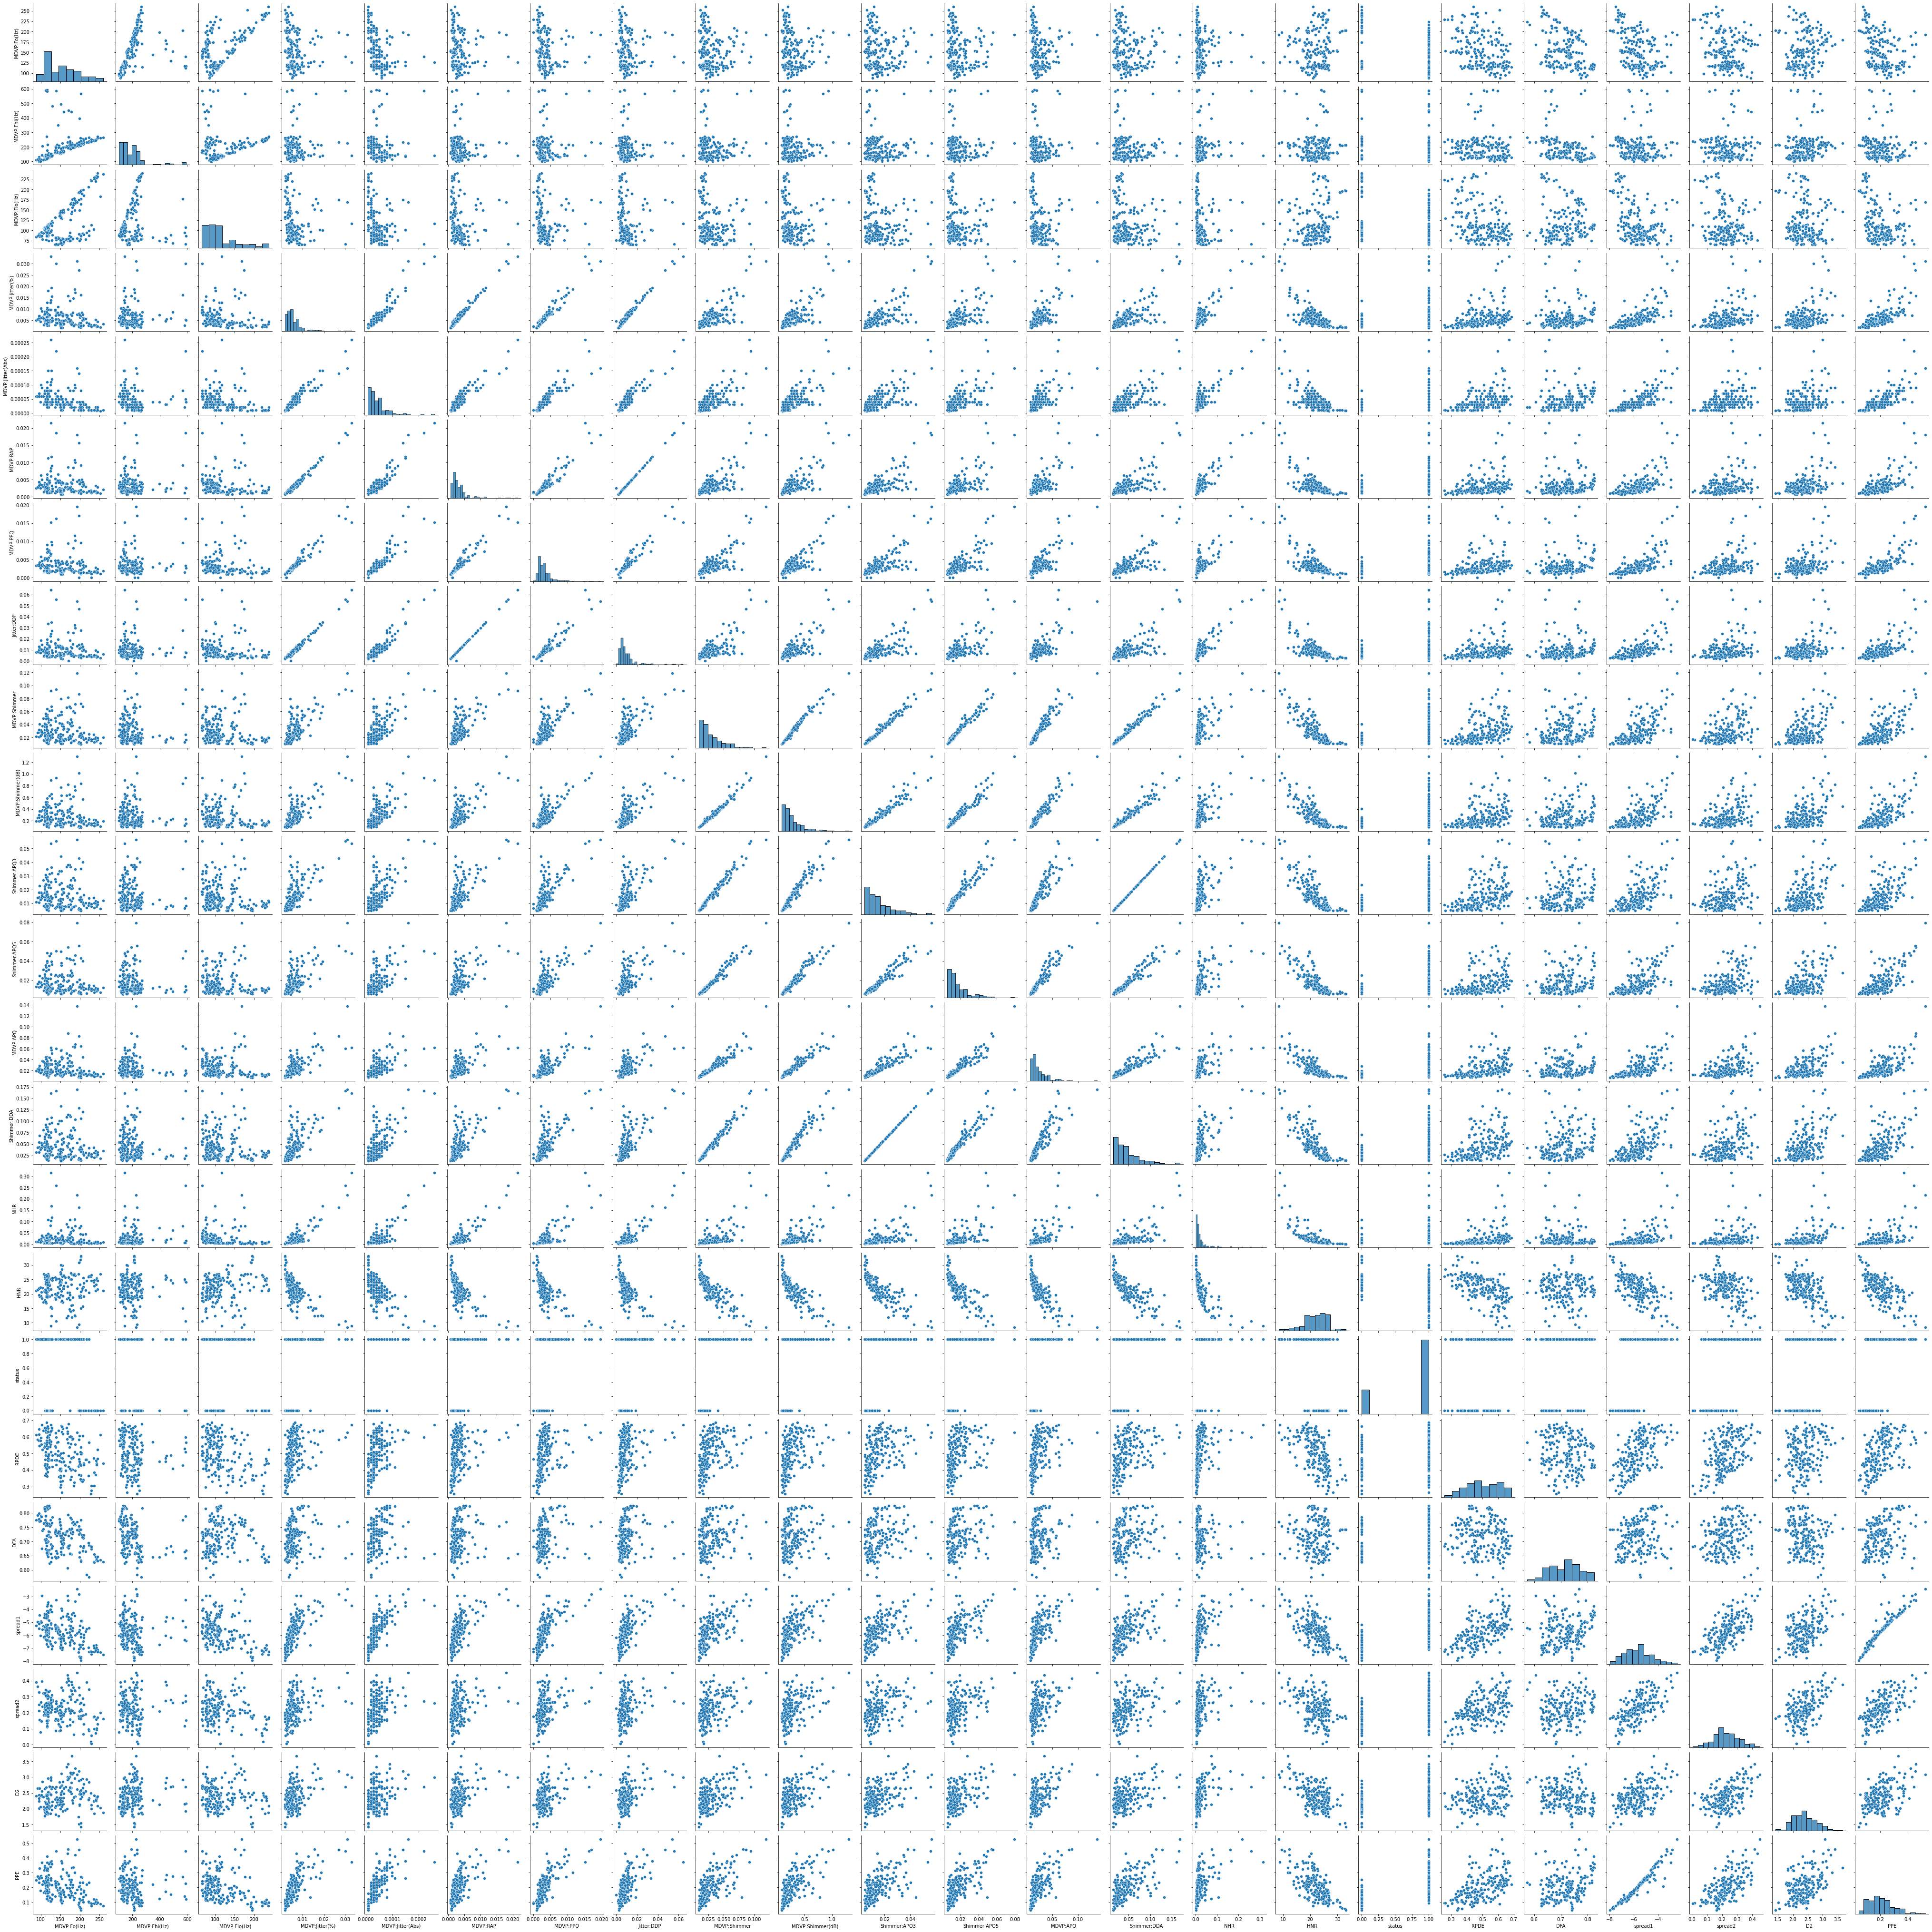

In [13]:
# Chart to plot multiple pairwise bivariate distributions in a dataset.
sns.pairplot(df)

<AxesSubplot:xlabel='MDVP:Fo(Hz)'>

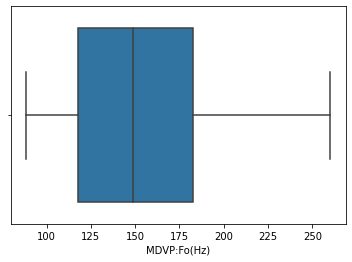

In [14]:
#Chart for finding outliers in a particular feature.
sns.boxplot(x='MDVP:Fo(Hz)',data=df)

In [15]:
# This shows us the count of values in the 'status' column.
df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [16]:
# Dropping columns of the dataframe.
df.drop('name',axis = 1, inplace=True)
df.shape

(195, 23)

In [17]:
# Scaling the columns of the data in a fixed range.
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
cols=df.columns
df= ms.fit_transform(df)
df= pd.DataFrame(df,columns=cols)

In [18]:
# Splitting the complete data into training and test data.
import sklearn
from sklearn.model_selection import train_test_split
x=df.drop('status',axis = 1)
y=df['status']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

# Using various Machine Learning Models:

# 1) K-Neighbors Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)

y_pred = knc.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print('The accuracy of this model is:',accuracy_score(y_test,y_pred),)
print()
print('The confusion matrix of this model is:\n',confusion_matrix(y_test,y_pred))
print()
print('The classification report of this model is:\n',classification_report(y_test,y_pred))

The accuracy of this model is: 0.8775510204081632

The confusion matrix of this model is:
 [[ 9  2]
 [ 4 34]]

The classification report of this model is:
               precision    recall  f1-score   support

         0.0       0.69      0.82      0.75        11
         1.0       0.94      0.89      0.92        38

    accuracy                           0.88        49
   macro avg       0.82      0.86      0.83        49
weighted avg       0.89      0.88      0.88        49



# 2) Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

LogisticRegression()

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('The accuracy of this model is:',accuracy_score(y_test,y_pred),)
print()
print('The confusion matrix of this model is:\n',confusion_matrix(y_test,y_pred))
print()
print('The classification report of this model is:\n',classification_report(y_test,y_pred))

The accuracy of this model is: 0.8979591836734694

The confusion matrix of this model is:
 [[ 8  3]
 [ 2 36]]

The classification report of this model is:
               precision    recall  f1-score   support

         0.0       0.80      0.73      0.76        11
         1.0       0.92      0.95      0.94        38

    accuracy                           0.90        49
   macro avg       0.86      0.84      0.85        49
weighted avg       0.90      0.90      0.90        49



# 3) Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',random_state=0)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

In [28]:
print('The accuracy of this model is:',dt.score(x_test,y_test))

The accuracy of this model is: 0.8979591836734694


# 4) Support Vector Classifier

In [29]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)

In [30]:
print('The accuracy of this model is:',svc.score(x_test,y_test))

The accuracy of this model is: 0.9387755102040817
